In [1]:
import numpy as np
import matplotlib.pyplot as plt
h=0.001
i0=1e-3
rho1=0.5
rho2=2.5
K21=(rho2-rho1)/(rho2+rho1)
scale=(i0*rho1)/(2*np.pi)
x_offset=0
z_offset=0

ex = np.zeros((1001,1001))
ez = np.zeros((1001,1001))
cx1 = np.zeros((50,1))
cx2 = np.zeros((50,1))
cz1 = np.zeros((50,1))
cz2 = np.zeros((50,1))
Ex = np.zeros((1001,1001))
Ez = np.zeros((1001,1001))
lookx1 =np.zeros((1001,1001))
lookx2 = np.zeros((1001,1001))
lookz1 = np.zeros((1001,1001))
lookz2 = np.zeros((1001,1001))
cxb1 = np.zeros((50,1))
czb1 = np.zeros((50,1))
cxb2 = np.zeros((50,1))
czb2 = np.zeros((50,1))

Ex_minus =np.zeros((1001,1001))
Ez_minus = np.zeros((1001,1001))

for k in range(0,1001):
    x= np.float32(x_offset+(k)*0.00001)
    for j in range(0,100):
        #import pdb;pdb.set_trace()

        z=z_offset+(j)*0.00001

        r=np.sqrt(x**2+z**2)

        Eox=x*scale/(x**2+z**2)**1.5
        Eoz=z*scale/(x**2+z**2)**1.5

        ex[j,k]=Eox
        ez[j,k]=Eoz

        for n in range(0,50):
            m=n-1
            cx1[n,0]=(x*K21**(n+1)/((2*(n+1)*h-z)**2+x**2)**1.5)
            cx2[n,0]=(x*K21**(n+1)/((2*(n+1)*h+z)**2+x**2)**1.5)
            cz1[n,0]=(-(2*(n+1)*h-z)*K21**(n+1)/((2*(n+1)*h-z)**2+x**2)**1.5)
            cz2[n,0]=((2*(n+1)*h+z)*K21**(n+1)/((2*(n+1)*h+z)**2+x**2)**1.5)

        Cxo1=scale*np.sum(cx1)
        Cxo2=scale*np.sum(cx2)
        Czo1=scale*np.sum(cz1)
        Czo2=scale*np.sum(cz2)

        lookx1[j,k]=Cxo1
        lookx2[j,k]=Cxo2
        lookz1[j,k]=Czo1
        lookz2[j,k]=Czo2

        Ex[j,k]=Eox+Cxo1+Cxo2
        Ez[j,k]=Eoz+Czo1+Czo2


for k in range(0,1001):
    x=np.float32(x_offset+(k)*0.00001)
    for j in range(100,1001):
        z=z_offset+(j)*0.00001
        r=np.sqrt(x**2+z**2)

        Eox=x*scale/(x**2+z**2)**1.5
        Eoz=z*scale/(x**2+z**2)**1.5

        ex[j,k]=Eox
        ez[j,k]=Eoz

        for n in range(0,50):
            m=n-0
            cxb1[n]=(x*K21**(n+1)/((2*m*h+z)**2+x**2)**-1.5)
            cxb2[n]=(x*K21**(n+1)/((2*(n+1)*h+z)**2+x**2)**-1.5)
            czb1[n]=((2*m*h+z)*K21**(n+1)/((2*m*h+z)**2+x**2)**1.5)
            czb2[n]=((2*(n+1)*h+z)*K21**(n+1)/((2*(n+1)*h+z)**2+x**2)**1.5)

        Cxob1=scale*np.sum(cxb1)
        Cxob2=scale*np.sum(cxb2)
        Czob1=scale*np.sum(czb1)
        Czob2=scale*np.sum(czb2)

        lookx1[j,k]=Cxob1
        lookx2[j,k]=Cxob2
        lookz1[j,k]=Czob1
        lookz2[j,k]=Czob2

        Ex[j,k]=Eox+Cxob1+Cxob2
        Ez[j,k]=Eoz+Czob1+Czob2

In [7]:
for j in range(0,1001):
    Ex_minus[:,1000-j]=Ex[:,j]
    Ez_minus[:,1000-j]=-Ez[:,j]

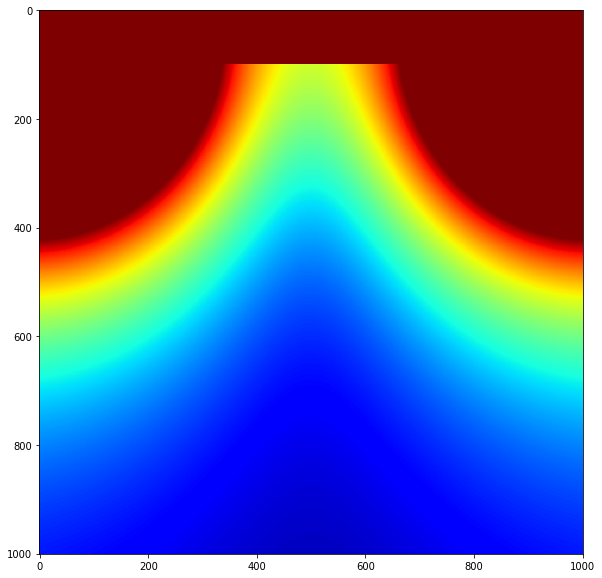

In [26]:
E=np.sqrt((Ex+Ex_minus)**2+(Ez+Ez_minus)**2)
%matplotlib inline
plt.figure(figsize=(10,10))
fig1 = plt.imshow(E)
fig1.set_cmap('jet')

plt.clim(0,10)

In [13]:
E[0:10,0:10]

array([[             nan,  795777.86513521,  198946.95009967,
          88422.8301438 ,   49739.48666191,   31834.70613555,
          22108.7215688 ,   16244.31785906,   12438.14993399,
           9828.69901819],
       [ 795774.41984616,  397889.35750574,  159157.73428736,
          79580.61951431,   46813.66608112,   30610.30729483,
          21511.19208048,   15919.42999103,   12246.78939433,
           9708.83084031],
       [ 198943.08756781,  159155.80649569,   99473.7300734 ,
          61215.95387881,   39791.66167601,   27443.73994729,
          19897.85156967,   15018.31904197,   11706.47271482,
           9366.14568763],
       [  88418.52569613,   79577.61375661,   61214.51185893,
          44211.49428634,   31833.31013646,   23407.87114436,
          17686.94757864,   13723.5996254 ,   10904.61929998,
           8845.76223956],
       [  49734.73651438,   46809.88396589,   39789.13693942,
          31832.09157009,   24869.6462034 ,   19411.30517225,
          15305.92529862

In [42]:
file = open('test_E.npy','wb')
np.save(file,E)